In [1]:
import torch
import torch.nn as nn

In [2]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

In [3]:
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

## *모델 선언*

In [4]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([[0], [1], [1], [0]])

In [5]:
fc1 = nn.Linear(2, 10, bias=True) # input_layer 2, hidden_layer1 10
fc2 = nn.Linear(10, 10, bias=True) # hidden_layer1 10, hidden_layer2 10
fc3 = nn.Linear(10, 10, bias=True) # hidden_layer2 10, hidden_layer3 10
fc4 = nn.Linear(10, 1, bias=True) # hidden_layer3 10, output_layer 1
sig = nn.Sigmoid()


model = nn.Sequential(fc1, sig, fc2, sig, fc3, sig, fc4, sig).to(device)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=10, out_features=1, bias=True)
  (7): Sigmoid()
)


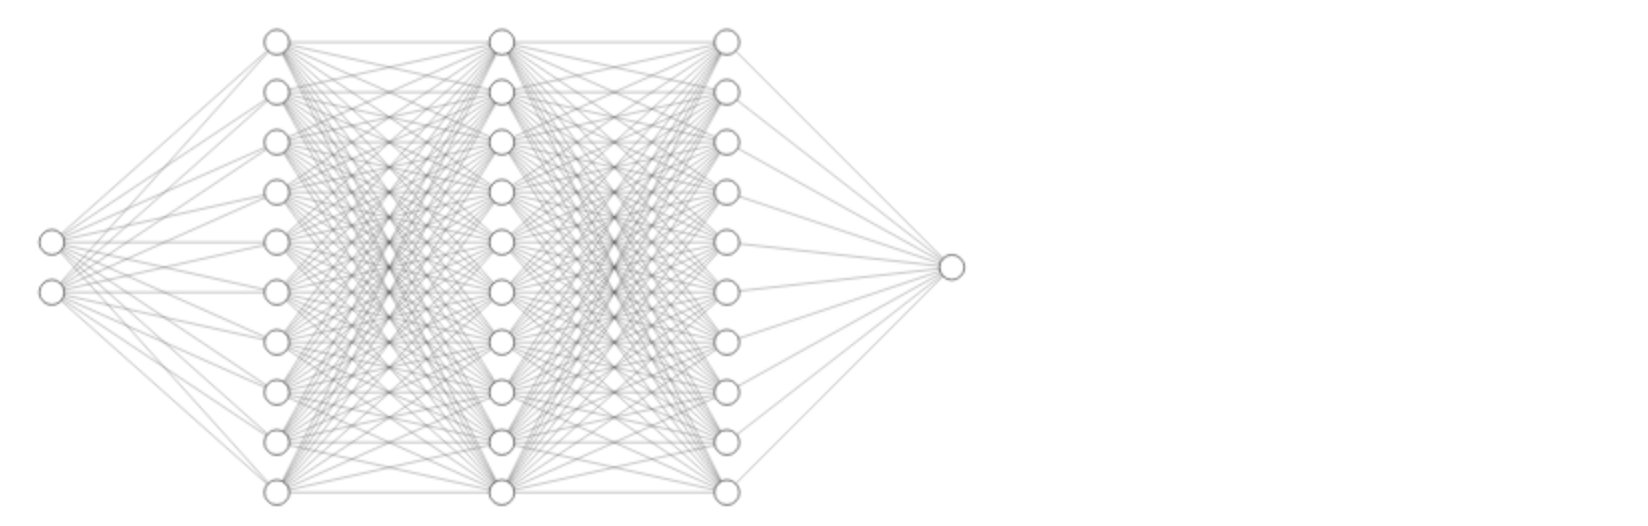

## *비용 함수, 옵티마이저*

In [9]:
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # modified learning rate from 0.
print(f"criterion : {criterion}")
print(f"optimizer : {optimizer}")
for i in model.parameters():
    print(f"model parameters : {i}")

criterion : BCELoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    lr: 1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
model parameters : Parameter containing:
tensor([[-0.5913, -0.0125],
        [-0.1368, -0.1613],
        [ 0.5393,  0.5390],
        [ 0.3171,  0.0046],
        [ 0.4594, -0.3346],
        [-0.2669,  0.1340],
        [-0.5527,  0.1716],
        [ 0.3324,  0.6927],
        [ 0.5890, -0.2480],
        [ 0.5254,  0.5479]], requires_grad=True)
model parameters : Parameter containing:
tensor([ 0.5707, -0.3955, -0.1420, -0.3777,  0.6238,  0.5911,  0.5589, -0.0933,
        -0.4917, -0.2611], requires_grad=True)
model parameters : Parameter containing:
tensor([[-0.0777,  0.0738,  0.0224,  0.3143, -0.0773,  0.2872,  0.2076,  0.0923,
          0.0344, -0.0821],
        [-0.2722, -0.0715,  0.1450,  0.2572, -0.3125, -0.3003, -0.0319, -0.1804,
         -0.0675,  0.0084],
        [ 0.3156, -0.2212, -0.1146,  0.2555,  0.1888,  0.2235, -0.27

## *train*

In [10]:
for epoch in range(10001):
    optimizer.zero_grad()
    
    # forward 연산
    hypothesis = model(X)
    
    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    # 100의 배수에 해당하는 epoch마다 비용 출력
    if epoch % 100 == 0:
        print(f"{epoch}epoch → {cost.item()}")

0epoch → 0.6948983669281006
100epoch → 0.693155825138092
200epoch → 0.6931535005569458
300epoch → 0.6931513547897339
400epoch → 0.693149209022522
500epoch → 0.6931473016738892
600epoch → 0.6931453943252563
700epoch → 0.6931434273719788
800epoch → 0.6931416988372803
900epoch → 0.6931397914886475
1000epoch → 0.6931380033493042
1100epoch → 0.6931361556053162
1200epoch → 0.6931343078613281
1300epoch → 0.6931324005126953
1400epoch → 0.6931304931640625
1500epoch → 0.6931284666061401
1600epoch → 0.6931264400482178
1700epoch → 0.6931242942810059
1800epoch → 0.6931220293045044
1900epoch → 0.6931197047233582
2000epoch → 0.6931171417236328
2100epoch → 0.6931145191192627
2200epoch → 0.6931115984916687
2300epoch → 0.6931084394454956
2400epoch → 0.6931051015853882
2500epoch → 0.6931014657020569
2600epoch → 0.6930974721908569
2700epoch → 0.6930930018424988
2800epoch → 0.6930879950523376
2900epoch → 0.6930825114250183
3000epoch → 0.6930763721466064
3100epoch → 0.6930692791938782
3200epoch → 0.69306117

## *Predict*

In [19]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    print(predicted)
    accuracy = (predicted == Y).float().mean()
    print(accuracy)
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor(1.)
모델의 출력값(Hypothesis):  [[1.1174576e-04]
 [9.9982870e-01]
 [9.9984229e-01]
 [1.8542419e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
